## Reading Image

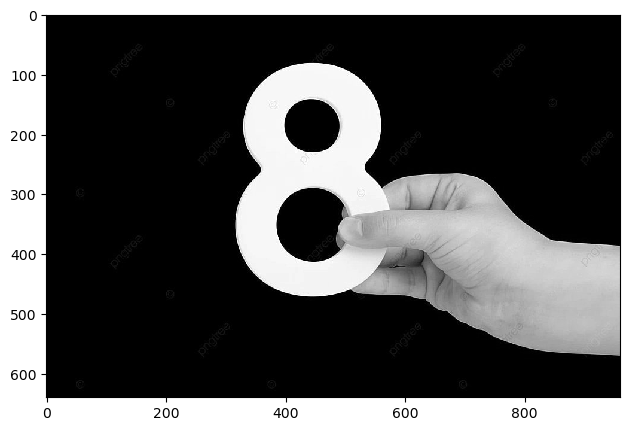

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io

image = skimage.io.imread(fname="eight.jpg", as_gray=True)
skimage.io.imshow(image)

In [16]:
print(image.shape)

(640, 960)


In [17]:
print(image[0,0])

0.0


In [18]:
print(image[5,5])

0.0


## Color Image

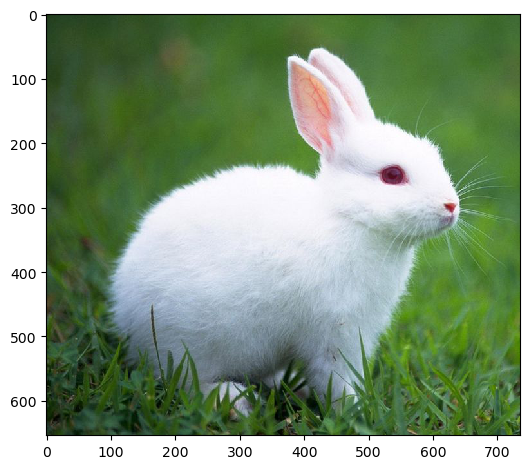

In [19]:
image2 = skimage.io.imread(fname="rabbit.jpg")
skimage.io.imshow(image2)

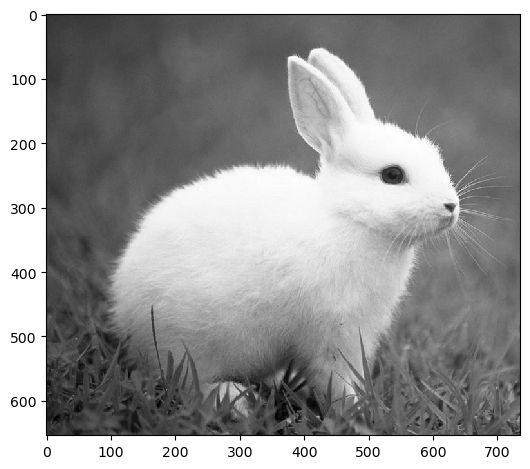

In [20]:
image2 = skimage.io.imread(fname="rabbit.jpg", as_gray=True)
skimage.io.imshow(image2)

In [21]:
imgshape = image2.shape
image2.shape

(654, 736)

In [22]:
feature = np.reshape(image2,(imgshape[0]*imgshape[1]))
feature.shape, feature

((481344,),
 array([0.19113333, 0.19113333, 0.1950549 , ..., 0.27370941, 0.30171098,
        0.27761608]))

## Mean Pixel

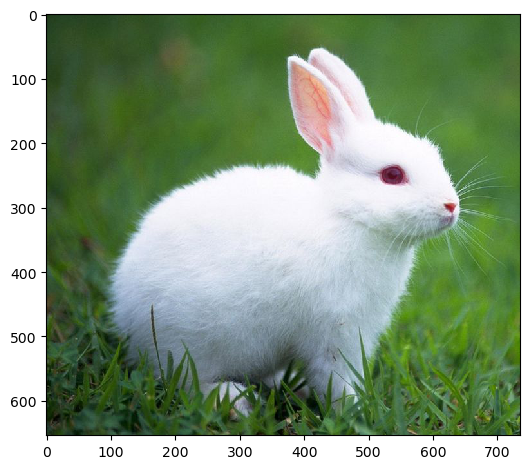

In [23]:
image3 = skimage.io.imread(fname="rabbit.jpg")
skimage.io.imshow(image3)

In [24]:
image3.shape

(654, 736, 3)

In [25]:
feature_matrix = np.zeros((image3.shape[0],image3.shape[1]))
feature_matrix.shape

(654, 736)

In [26]:
for i in range(0,image3.shape[0]):
    for j in range(0,image3.shape[1]):
        feature_matrix[i][j] = ((int(image3[i,j,0]) + int(image3[i,j,1]) + int(image3[i,j,2]))/3)

feature_matrix.shape
feature_matrix

array([[36.33333333, 36.33333333, 37.33333333, ..., 73.66666667,
        74.66666667, 75.66666667],
       [37.33333333, 37.33333333, 37.33333333, ..., 73.66666667,
        73.66666667, 74.66666667],
       [38.33333333, 37.33333333, 37.33333333, ..., 73.66666667,
        72.66666667, 72.66666667],
       ...,
       [49.66666667, 47.66666667, 44.66666667, ..., 68.33333333,
        64.        , 44.        ],
       [48.        , 47.        , 47.        , ..., 74.33333333,
        65.66666667, 42.66666667],
       [46.33333333, 46.33333333, 45.66666667, ..., 55.        ,
        62.        , 55.33333333]])

In [27]:
feature3 = np.reshape(feature_matrix, (image3.shape[0]*image3.shape[1]))
feature3.shape

(481344,)

## หาขอบของวัตถุ เริ่มจากภาพระดับเทา และใช้ฟิวเตอร์

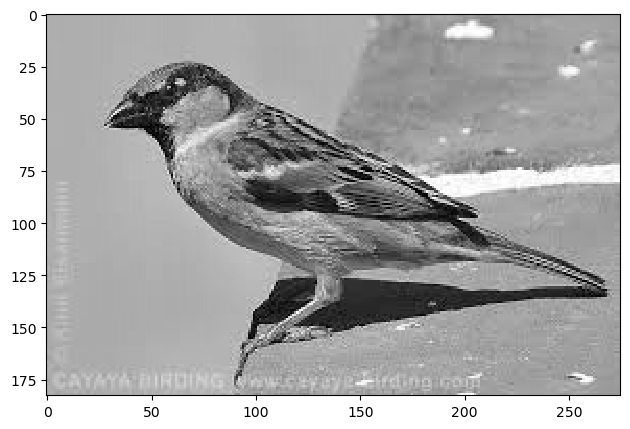

In [28]:
image4 = skimage.io.imread(fname="pasdom.jpg", as_gray=True)
skimage.io.imshow(image4)
import skimage.filters
edges_prewitt_horizontal = skimage.filters.prewitt_h(image4)
edges_prewitt_vertical = skimage.filters.prewitt_v(image4)

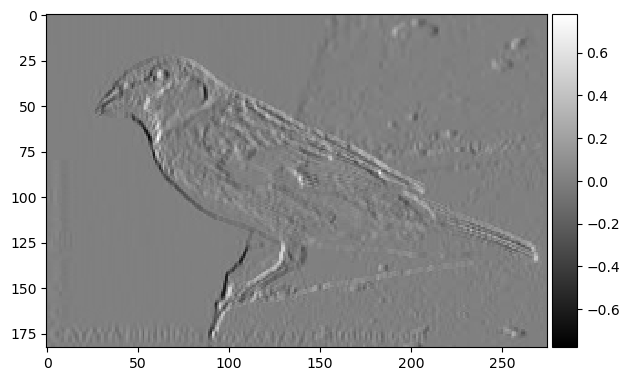

In [30]:
skimage.io.imshow(edges_prewitt_vertical, cmap='gray')

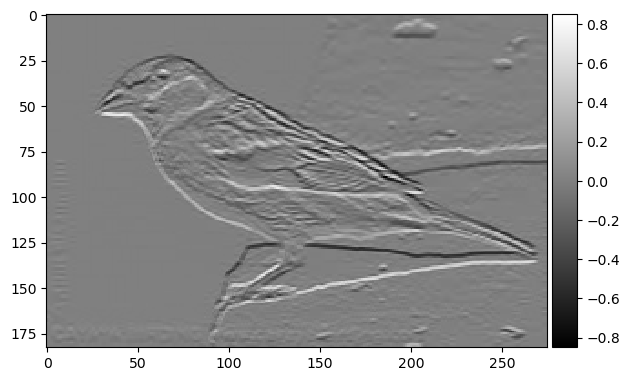

In [31]:
skimage.io.imshow(edges_prewitt_horizontal, cmap='gray')

## Implementing HOG Feature Descriptor in Python

In [11]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
%matplotlib inline

(500, 400, 3)


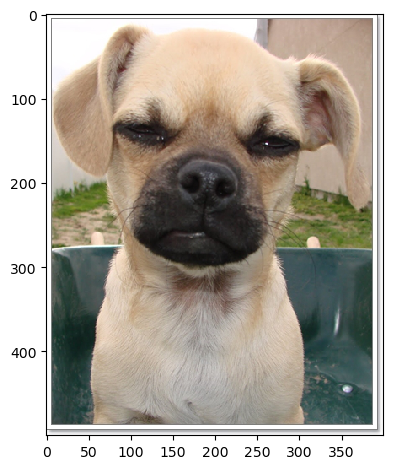

In [14]:
#reading the image
img = imread('puppy.jpg')
imshow(img)
print(img.shape)

(128, 64, 3)


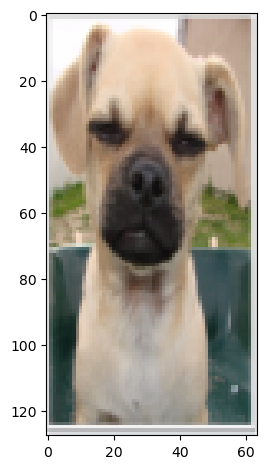

In [32]:
#resizing image
resized_img = skimage.transform.resize(img, (128,64))
skimage.io.imshow(resized_img)
print(resized_img.shape)

In [43]:
#creating hog features
fd, hog_image = skimage.feature.hog(resized_img, 
                                    orientations=9,
                                    pixels_per_cell = (8, 8), 
                                    cells_per_block=(2, 2), 
                                    visualize=True,
                                    channel_axis=-1) #multichannel=True) ไม่ยอมรับในเวอร์ชั่นนี้

## Look at the HOG image:

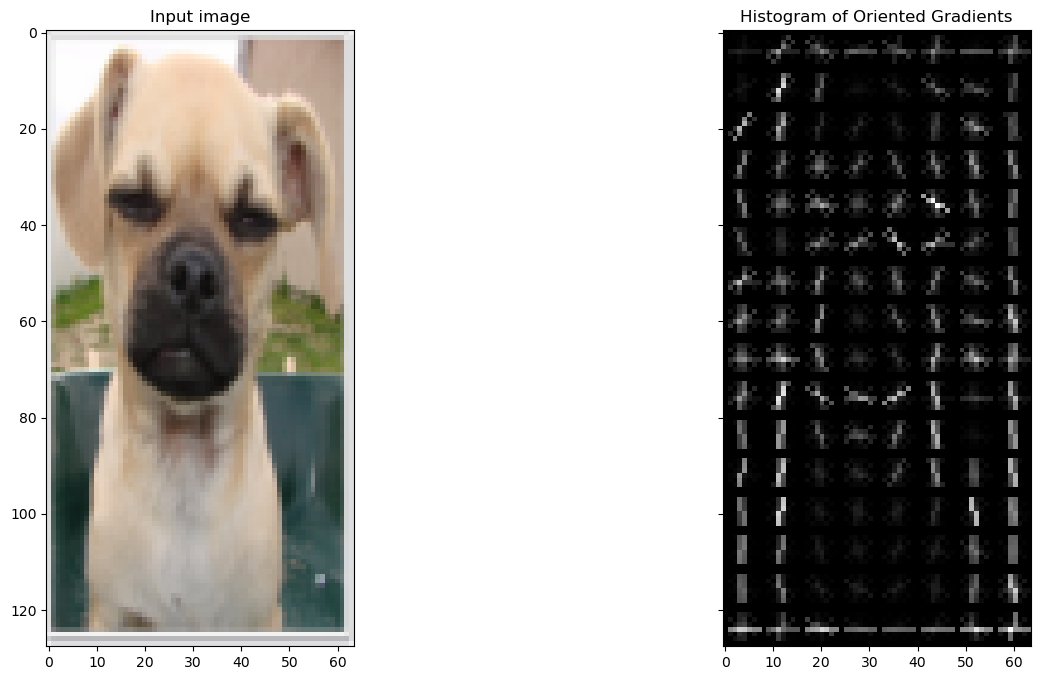

In [42]:
from skimage import exposure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()